<a href="https://colab.research.google.com/github/BDouchet/ML-concepts/blob/main/NN/Spotify_RapFR_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# setup

In [ ]:
!pip -q install spotipy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 236 kB 7.5 MB/s 
     |████████████████████████████████| 62 kB 951 kB/s 
     |████████████████████████████████| 140 kB 45.1 MB/s 


In [ ]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
cid ="abacd883ec6c485ab06f1a3f7d34c8b3"
secret = "6998a332313b44e3b0d4a4f8c56b074b" 
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Extract Track ids

Extraction of tracks using playlist of French Rap

In [ ]:
track_results = sp.playlist_items('4l1CEhc7ZPbaEtiPdCSGbl',market='FR')['items']
ids=np.array([track_results[i]['track']['id'] for i in range(len(track_results))])
ids.shape

(85,)

In [ ]:
track_results = sp.playlist_items('4l1CEhc7ZPbaEtiPdCSGbl',market='FR')['items']
ids=np.array([track_results[i]['track']['id'] for i in range(len(track_results))])

track_results = sp.playlist_items('1vJRCYfOpwM5LuVCrZpa1K',market='FR')['items']
ids=np.union1d(ids,
               np.array([track_results[i]['track']['id'] for i in range(len(track_results))]))

track_results = sp.playlist_items('37i9dQZF1DX4sJFeoGlF41',market='FR')['items']
ids=np.union1d(ids,
               np.array([track_results[i]['track']['id'] for i in range(len(track_results))]))

for i in range(0,5000,100):
    playlists=['2dRYCqtniv09ode7AL2zUL','5JEWr5PlRJT3uNz2EGaOOg','6zKwcm0z8d497vZ28XUYLk',
               '3WgEbuy7GjWU59HrZgbvmH','3VqLwOGLhgfaNie8rjHsXr','1WjJfuZdirquASaZPJ8ZzX']
    
    for playlist in playlists:
    
        track_results = sp.playlist_items(playlist,limit=100,market='FR',offset=i)['items']
        new_ids=np.array([track_results[i]['track']['id'] for i in range(len(track_results))])
        ids=np.union1d(ids,new_ids)


ids.shape

(2230,)

We want to predict the popularity of the tracks from a specified album. Here, it is the new album Hiver à Paris from Dinos.

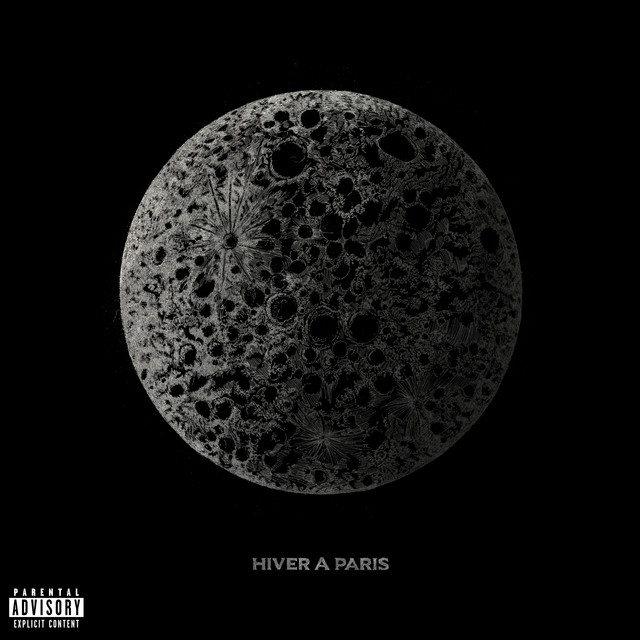

In [ ]:
hap=sp.album_tracks('6dgmwFp2mMEhTmOJ32vDPA',market='FR')['items']
hap_ids=np.array([hap[i]['id'] for i in range(len(hap))])

hap_ids.shape

(21,)

Take off the Albums songs from training dataset

In [ ]:
ids_train=np.setdiff1d(ids,hap_ids)
ids_train.shape

(2222,)

# Extract Audio Data 

Spotify provide access to specific data of the songs. We extract them in order to predict the popularity thanks to audio features. 

## Popularity & info

[Spotify](https://developer.spotify.com/documentation/web-api/reference/#objects-index) defined popularity as : 

*The value will be between 0 and 100, with 100 being the most popular.
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time*

So it's important to keep in mind that recent songs ususally have a higher popularity.

In [ ]:
dataset=pd.DataFrame(ids_train,columns=['id'])
dataset[['name','popularity','album','artist']]=np.nan
dataset.set_index('id',inplace=True)

for i in range(0,len(ids_train),50):
    request=sp.tracks(ids_train[i:i+50],market='FR')['tracks']
    for req in request:
        dataset.loc[req['id']]=[req['name'],req['popularity'],
                        req['album']['name'],req['artists'][0]['name']]
dataset

,name,popularity,album,artist
id,,,,
00LOYytr9EgGMAh4dEos8q,Ça sert - Live Session,20.0,Nemir,Nemir
00eKugfChtk1HOCmO1bpS7,Xan,47.0,Etoile Noire 2.0 : ZLM,Luv Resval
00s0HPhy1PXovEfmcDcEx6,Dubaï,47.0,"Freebase, Vol. 04",Kekra
00y6yHW6kv07HqWmodzjGb,SANG FROID,47.0,NOUVO MODE,Sneazzy
016CNVVPkGR7QA8oNRhPxL,Sheguey 12,41.0,Sheguey 12,Gradur
...,...,...,...,...
7zQfWR8si2NiIffwC30thv,Chanson pour ton fils,22.0,Ça va bien s'passer,Flynt
7zcQ1j3vTLKWCkmPtO5rSR,Regarde le monde,40.0,Quelque chose a survécu,Ärsenik
7zgKUbJczQXGEICIwP6Diw,RAPPEL,64.0,RAPPEL,Gazo


Example of the Top 10 most popular songs in the dataset

In [ ]:
dataset.sort_values('popularity',ascending=False).head(10)

,name,popularity,album,artist
id,,,,
3D29kjUyWxsT3jUUTtARVQ,DIE,81.0,KMT,Gazo
6PrB4KpvuoYWtwjPC5a44S,Balader,78.0,Sans visa,Soolking
6OZwia8loN0aPS0vTvsBjR,TOUT VA BIEN (feat. Ninho & Naps),77.0,QUARTIERS NORD,Alonzo
4ZpIuzx91EAPK3VimONbfB,FADE UP,77.0,FADE UP,ZEG P
5HavMB9WGE33KK6NL8XjXl,Fetty Wap,76.0,Fetty Wap,Maes
0z3bi63SNZ5ylyHOzb81Uq,PETETE,76.0,PETETE,Gambi
5UPpgOKi0UQMMMSzWWgJJe,Amber,76.0,Amber,Zola
2A44J8NMBI9DKi0AZW2W84,Urus,76.0,Urus,Favé
3TVUW7bJJWDOonkVCZxfLV,Pas bête,74.0,L'Élu,Beendo Z


List of represented artists

In [ ]:
np.sort(dataset.artist.unique())

array(['100 Blaze', '113', '13 Block', '1863', '1PLIKÉ140', '313',
       '47ter', '4Keus', '7 Jaws', '8ruki', 'A$tro Boi', 'A2h', 'ACHIM',
       'ALFRED', 'ASHE 22', 'Abd Al Malik', 'Abis', 'Ablv', 'Akhenaton',
       'Aladin 135', 'Alkpote', 'Allebou', 'Alonzo', 'Alpha Wann',
       'Ambre Sls', 'Arma Jackson', 'Artÿ', 'Asakura', 'Ashh', 'Assy',
       'Ateyaba', 'Azur', 'B-DPE', 'B.B. Jacques', 'BEN plg', 'BIG B',
       'BKL', 'BU$HI', 'Bakari', 'Barack Adama', 'Beeby', 'Beendo Z',
       'Bekar', 'Benab', 'Benjamin Epps', 'Beny', 'Bigflo & Oli', 'Bilel',
       'Blackawt', 'Bola', 'Bolémvn', 'Booba', 'Bosh', 'Bramsito',
       'Brasco', 'Brass', 'Brav', 'Bunny', 'Caballero & JeanJass',
       'Capo Plaza', 'Captaine Roshi', 'Casseurs Flowters', 'Casus Belli',
       'Chiens de Paille', 'Chilla', 'Chiloo', 'Coelho', 'Columbine',
       'Costa', 'Coyote Jo Bastard', 'DA Uzi', 'DB', 'DENZO', 'DJ Elite',
       'DOXX', 'DTF', 'Dabs', 'Dadju', 'Dadoo', 'Dajak', 'Dala', 'Damon',
      

Popularity Distribution

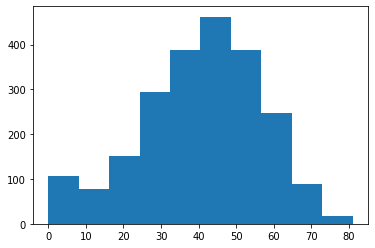

In [ ]:
import matplotlib.pyplot as plt

plt.hist(dataset.popularity)
plt.show()

Same with HAP...

In [ ]:
# for HAP

hap=pd.DataFrame(hap_ids,columns=['id'])
hap[['name','popularity','album','artist']]=np.nan
hap.set_index('id',inplace=True)

request=sp.tracks(hap_ids,market='FR')['tracks']

for req in request:
    hap.loc[req['id']]=[req['name'],req['popularity'],
                            req['album']['name'],req['artists'][0]['name']]

hap.sort_values('popularity',inplace=True,ascending=False)
hap.drop_duplicates('name',inplace=True,keep=False)
hap

,name,popularity,album,artist
id,,,,
6OhaunEHa10FjmOMFuxy38,Chrome Hearts,69.0,Hiver à Paris,Dinos
0RwNWOrgD7nrpf1xaboLcU,Pichichi Anderson,68.0,Hiver à Paris,Dinos
6ZcKyt3c0bnJjn4igDFrzf,Portes Suicide,67.0,Hiver à Paris,Dinos
2jEGvVyqXUxsHAELiW9YuH,Ma Baby,67.0,Hiver à Paris,Dinos
1eew7mUVs53VykWDJfc4gp,L'Univers Ne Nous Voit Pas Danser,65.0,Hiver à Paris,Dinos
3NxhOk9Ewg6pFff3Dk4G3i,Simyaci,64.0,Hiver à Paris,Dinos
4g2lY55s8TgQDHamXmfs3z,Modus Vivendi,64.0,Hiver à Paris,Dinos
4Q2dD11casdhNZOoTP8VjW,Quatre Saisons,64.0,Hiver à Paris,Dinos
17hT2nm4w2HvqFVWJ87Pw4,AMG Performance,64.0,Hiver à Paris,Dinos


## Audio features

12 features have been extracted : 

* **acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* **danceability** : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

* **duration_ms** : The duration of the track in milliseconds

* **energy** : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* **key** : The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

* **instrumentalness** : Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

* **mode** : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* **speechiness** : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* **tempo** : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [ ]:
sp.audio_features(['1BhUyJoaS9iVvssrLx9oTD'])[0]

{'danceability': 0.808,
 'energy': 0.44,
 'key': 1,
 'loudness': -13.101,
 'mode': 1,
 'speechiness': 0.275,
 'acousticness': 0.332,
 'instrumentalness': 1.53e-05,
 'liveness': 0.0912,
 'valence': 0.54,
 'tempo': 98.033,
 'type': 'audio_features',
 'id': '1BhUyJoaS9iVvssrLx9oTD',
 'uri': 'spotify:track:1BhUyJoaS9iVvssrLx9oTD',
 'track_href': 'https://api.spotify.com/v1/tracks/1BhUyJoaS9iVvssrLx9oTD',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1BhUyJoaS9iVvssrLx9oTD',
 'duration_ms': 171496,
 'time_signature': 4}

In [ ]:
new_cols=['acousticness','danceability','duration_ms','energy',
         'instrumentalness','key','liveness','loudness','mode',
         'speechiness','tempo','valence']

dataset[new_cols]=np.nan

for i in range(0,len(dataset.index.to_list()),100):
    request=sp.audio_features(dataset.index.to_list()[i:i+100])
    for req in request:
        dataset.loc[req['id'],new_cols]=[req[col] for col in new_cols]

dataset

,name,popularity,album,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
id,,,,,,,,,,,,,,,,
00LOYytr9EgGMAh4dEos8q,Ça sert - Live Session,20.0,Nemir,Nemir,0.9250,0.579,182008.0,0.203,0.000002,11.0,0.1330,-12.563,0.0,0.1080,108.978,0.423
00eKugfChtk1HOCmO1bpS7,Xan,47.0,Etoile Noire 2.0 : ZLM,Luv Resval,0.3060,0.885,172107.0,0.484,0.000002,1.0,0.2520,-7.324,1.0,0.2640,137.930,0.467
00s0HPhy1PXovEfmcDcEx6,Dubaï,47.0,"Freebase, Vol. 04",Kekra,0.2780,0.844,189833.0,0.733,0.000000,9.0,0.1240,-5.931,0.0,0.3340,129.985,0.411
00y6yHW6kv07HqWmodzjGb,SANG FROID,47.0,NOUVO MODE,Sneazzy,0.5360,0.841,184413.0,0.644,0.000003,10.0,0.0910,-5.882,1.0,0.2320,79.006,0.307
016CNVVPkGR7QA8oNRhPxL,Sheguey 12,41.0,Sheguey 12,Gradur,0.2670,0.687,138583.0,0.482,0.000001,0.0,0.1090,-15.482,0.0,0.4720,179.915,0.664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7zQfWR8si2NiIffwC30thv,Chanson pour ton fils,22.0,Ça va bien s'passer,Flynt,0.8650,0.527,211187.0,0.157,0.021300,7.0,0.1130,-19.454,0.0,0.0684,130.157,0.186
7zcQ1j3vTLKWCkmPtO5rSR,Regarde le monde,40.0,Quelque chose a survécu,Ärsenik,0.0163,0.740,301667.0,0.809,0.000095,6.0,0.1070,-4.734,1.0,0.2170,92.065,0.524
7zgKUbJczQXGEICIwP6Diw,RAPPEL,64.0,RAPPEL,Gazo,0.4020,0.496,217948.0,0.785,0.000003,4.0,0.0768,-6.460,0.0,0.1950,97.220,0.545


In [ ]:
hap[new_cols]=np.nan

request=sp.audio_features(hap.index.to_list())

for req in request:
    hap.loc[req['id'],new_cols]=[req[col] for col in new_cols]
hap

,name,popularity,album,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
id,,,,,,,,,,,,,,,,
6OhaunEHa10FjmOMFuxy38,Chrome Hearts,69.0,Hiver à Paris,Dinos,0.4640,0.579,169320.0,0.523,0.000000,4.0,0.0841,-8.773,0.0,0.4040,79.972,0.382
0RwNWOrgD7nrpf1xaboLcU,Pichichi Anderson,68.0,Hiver à Paris,Dinos,0.7500,0.652,108827.0,0.586,0.000011,1.0,0.3740,-6.852,0.0,0.3340,140.226,0.793
6ZcKyt3c0bnJjn4igDFrzf,Portes Suicide,67.0,Hiver à Paris,Dinos,0.3400,0.886,227893.0,0.655,0.000016,2.0,0.0540,-5.194,0.0,0.3210,108.781,0.832
2jEGvVyqXUxsHAELiW9YuH,Ma Baby,67.0,Hiver à Paris,Dinos,0.3330,0.828,198693.0,0.801,0.000062,1.0,0.0841,-5.242,0.0,0.1320,129.984,0.369
1eew7mUVs53VykWDJfc4gp,L'Univers Ne Nous Voit Pas Danser,65.0,Hiver à Paris,Dinos,0.7300,0.648,272227.0,0.694,0.000002,6.0,0.1810,-7.340,1.0,0.4120,94.023,0.415
3NxhOk9Ewg6pFff3Dk4G3i,Simyaci,64.0,Hiver à Paris,Dinos,0.8120,0.488,228760.0,0.539,0.000382,9.0,0.0876,-9.819,0.0,0.3960,83.074,0.299
4g2lY55s8TgQDHamXmfs3z,Modus Vivendi,64.0,Hiver à Paris,Dinos,0.0387,0.739,179507.0,0.706,0.000301,5.0,0.1220,-6.489,0.0,0.0660,142.044,0.783
4Q2dD11casdhNZOoTP8VjW,Quatre Saisons,64.0,Hiver à Paris,Dinos,0.7440,0.692,217133.0,0.714,0.000000,0.0,0.1090,-6.120,0.0,0.3360,91.952,0.547
17hT2nm4w2HvqFVWJ87Pw4,AMG Performance,64.0,Hiver à Paris,Dinos,0.7060,0.799,259213.0,0.692,0.000608,10.0,0.0806,-6.568,0.0,0.3410,105.943,0.371


# Data Preprocessing

* Standard Scaler
* Shuffling dataset
* Split Train Test

In [ ]:
df=dataset.copy()
happ=hap.copy()
df.drop(['name','album','artist'],inplace=True,axis=1)
happ.drop(['name','album','artist'],inplace=True,axis=1)

stds=df.std()
means=df.mean()

df=(df-means)/stds
qalff=(happ-means)/stds

X=df[df.columns[1:]].to_numpy()
Y=df.popularity.to_numpy()

X_app=qalff[qalff.columns[1:]].to_numpy()

print(X.shape,Y.shape,X_app.shape)

(2222, 12) (2222,) (21, 12)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X,Y=shuffle(X,Y,random_state=42)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1777, 12) (445, 12) (1777,) (445,)


# Simple Model

Basic ANN to demonstrate how Neural Networks work 

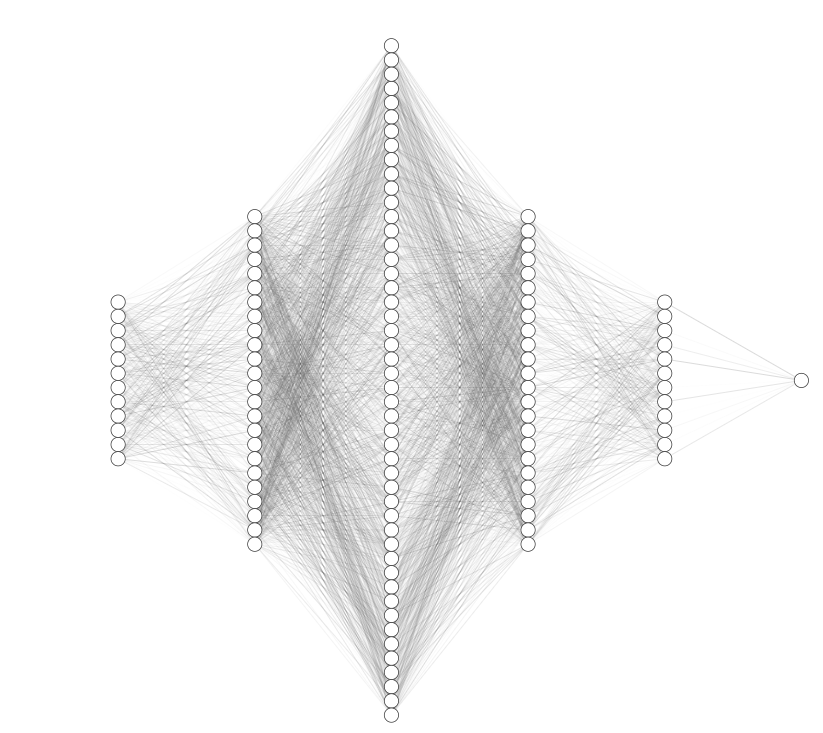

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
nn = models.Sequential()

nn.add(layers.Dense(24,activation='relu',input_shape=(12,)))
nn.add(layers.BatchNormalization())

nn.add(layers.Dense(48,activation='relu'))
nn.add(layers.BatchNormalization())
nn.add(layers.Dropout(0.5))

nn.add(layers.Dense(24,activation='relu'))
nn.add(layers.BatchNormalization())
nn.add(layers.Dropout(0.5))

nn.add(layers.Dense(12,activation='relu'))
nn.add(layers.BatchNormalization())
nn.add(layers.Dropout(0.5))

nn.add(layers.Dense(1,activation='tanh'))

nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 24)                312       
                                                                 
 batch_normalization_4 (Batc  (None, 24)               96        
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 48)                1200      
                                                                 
 batch_normalization_5 (Batc  (None, 48)               192       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 48)                0         
                                                                 
 dense_7 (Dense)             (None, 24)               

In [ ]:
nn.compile(optimizer='adam',metrics=['mae'],loss='mse')
history=nn.fit(X_train,Y_train,epochs=75,validation_data=(X_test,Y_test),verbose=0)

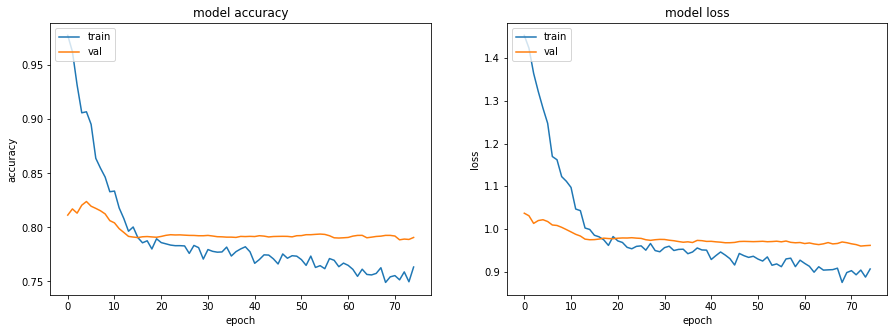

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')

plt.show()

# Analysis

Predictions realised 05/12/22

In [ ]:
print('Training Precision : +/- {:.2f}'.format(nn.evaluate(X_train,Y_train,verbose=0)[1]*stds.popularity))
print('Testing Precision : +/- {:.2f}'.format(nn.evaluate(X_test,Y_test,verbose=0)[1]*stds.popularity))

Training Precision : +/- 11.72
Testing Precision : +/- 12.60


1/1 [==============================] - 0s 32ms/step


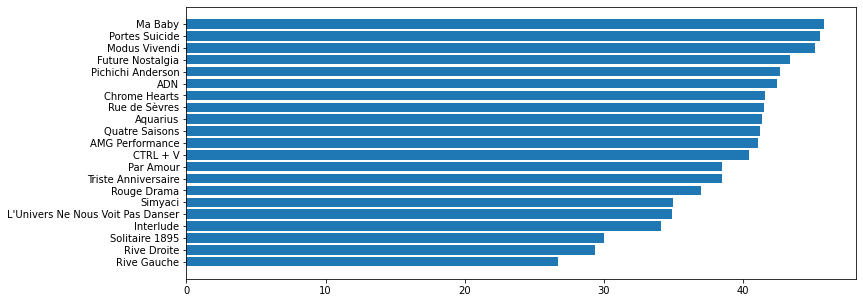

In [ ]:
Y_pred=nn.predict(X_app)

values=Y_pred*stds.popularity+means.popularity

out=hap.loc[:,['name','popularity']]
out.loc[:,'pophat']=np.squeeze(values)
out.sort_values('pophat',inplace=True)

plt.figure(figsize=(12,5))

plt.barh(np.arange(len(hap)),out.pophat.to_numpy())
plt.yticks(np.arange(len(hap)),out.name.to_numpy())
plt.show()

Plays the 05/12/2022

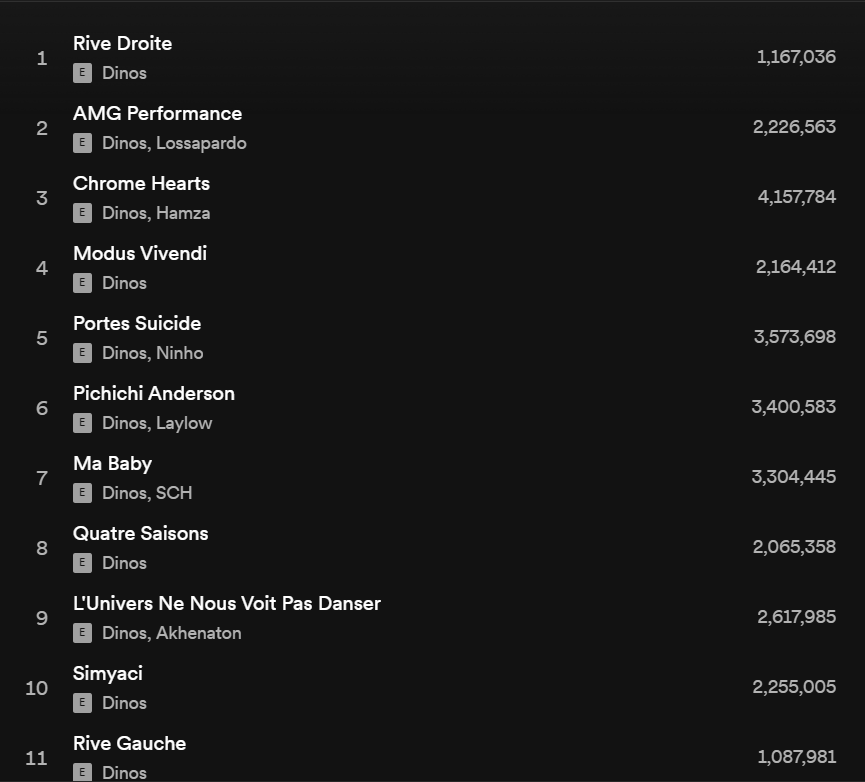

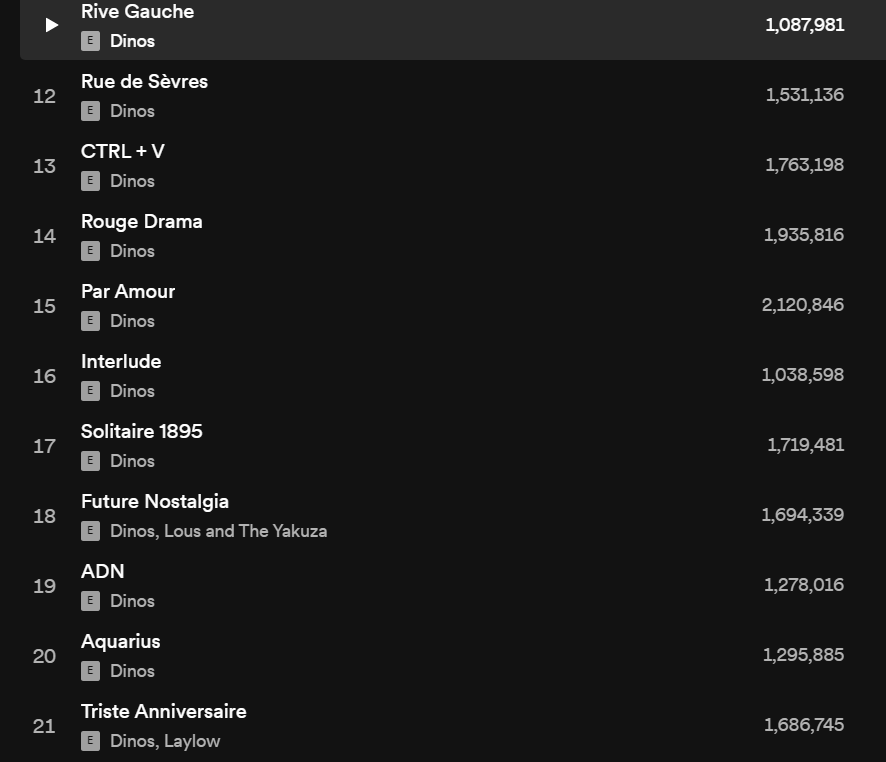

# Feature Analysis

## Correlation Matrix

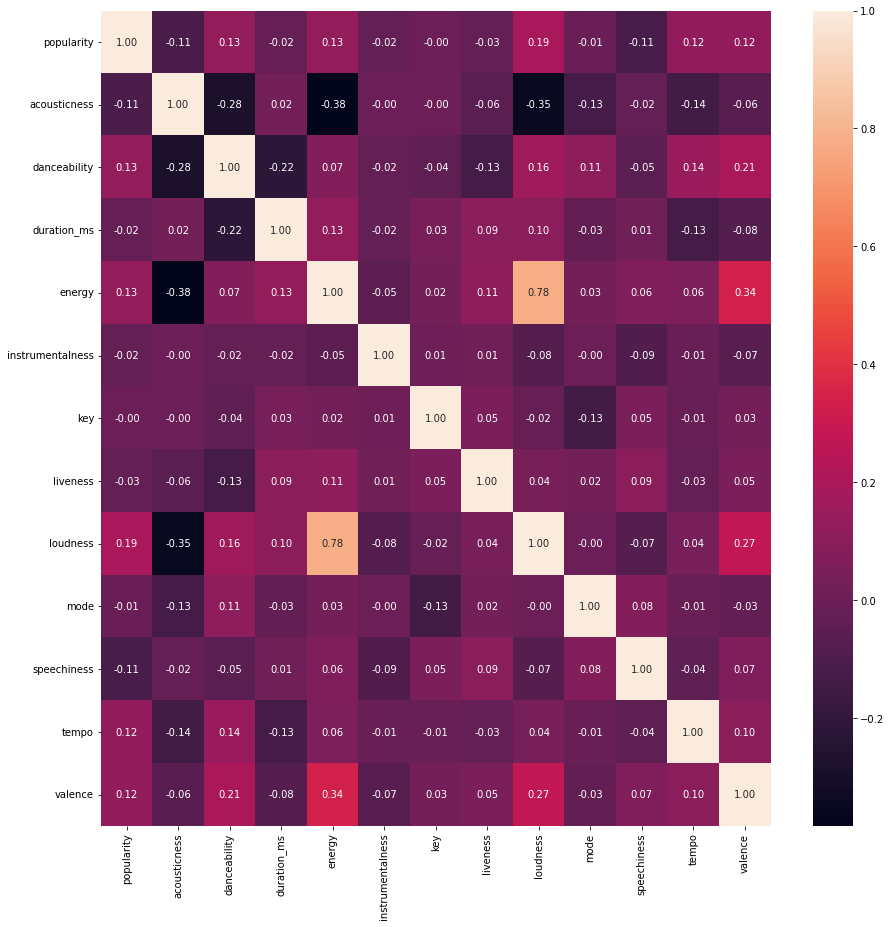

In [ ]:
df_corr=df.corr()
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sn.heatmap(df_corr,annot=True,fmt=".2f")
plt.show()

## With Trees Algorithmn

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()

dt.fit(X,Y)
rf.fit(X,Y)
gb.fit(X,Y)

print('Decision Tree : {:.2f}'.format(r2_score(Y,dt.predict(X))))
print('Random Forest : {:.2f}'.format(r2_score(Y,rf.predict(X))))
print('Gradient Boosting : {:.2f}'.format(r2_score(Y,gb.predict(X))))
print()
print('Baseline : {:.2f}'.format(r2_score(Y,np.array([Y.mean() for y in Y]))))


Decision Tree : 0.99
Random Forest : 0.87
Gradient Boosting : 0.32

Baseline : 0.00


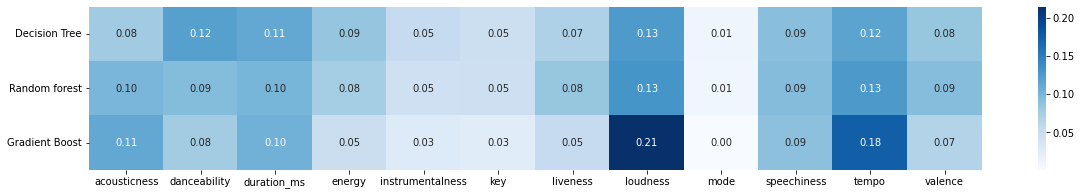

In [ ]:
plt.figure(figsize=(20,3))
tab = pd.DataFrame(data=[dt.feature_importances_,rf.feature_importances_,gb.feature_importances_],
                   columns=df.columns[1:],
                   index=['Decision Tree','Random forest','Gradient Boost'])
sn.heatmap(tab,annot=True,fmt=".2f",cmap='Blues')
plt.show()